In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [82]:
lats=np.random.uniform(-90,90,size=1500)
lngs=np.random.uniform(-180,180,size=1500)
lat_lngs=zip(lats,lngs)
coordinates=list(lat_lngs)

In [83]:
from citipy import citipy
cities=[]

for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

632

In [84]:
#API
import requests
from config import weather_api_key
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url=url+"&q="+"Boston"
city_weather=requests.get(city_url)

city_weather  #city_weather.status_code will give us: 200 so we have data

<Response [200]>

In [85]:
boston_data=city_weather.json()
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'},
  {'id': 502,
   'main': 'Rain',
   'description': 'heavy intensity rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 65.97,
  'feels_like': 66.72,
  'temp_min': 63.61,
  'temp_max': 68.25,
  'pressure': 1006,
  'humidity': 95},
 'visibility': 2414,
 'wind': {'speed': 1.01, 'deg': 306, 'gust': 5.99},
 'rain': {'1h': 3.16},
 'clouds': {'all': 90},
 'dt': 1631250315,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1631269155,
  'sunset': 1631315001},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [86]:
lat=boston_data["coord"]["lat"]
lng=boston_data["coord"]["lon"]
max_temp=boston_data["main"]["temp_max"]
humidity=boston_data["main"]["humidity"]
clouds=boston_data["clouds"]["all"]
wind=boston_data["wind"]["speed"]
print(lat,lng,max_temp,humidity,clouds,wind)

42.3584 -71.0598 68.25 95 90 1.01


In [87]:
#Convert the data timestamp: boston_data["dt"]
from datetime import datetime
date=boston_data["dt"]
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-09-10 05:05:15'

In [88]:
#6.2.6
city_data=[]
print("Beginning Data Retrieval")
print("-------------------------")

record_count=1
set_count=1
    
# instead of: for i in range(len(cities)):
#because this will throw an error, we used enumerate method
for i, city in enumerate(cities):
    if (i%50==0 and i>=50):
        set_count+=1
        record_count=1
    #city_url=url+"&q="+cities[i]
    city_url=url+"&q="+city.replace(" ","+") #this will find the weather data for the city instead of the first part of city name
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count+=1
    try:
            # Parse the JSON and retrieve data.
            city_weather = requests.get(city_url).json()
            # Parse out the needed data.
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
            city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

# If an error is experienced, skip the city.
    except:
            print("City not found. Skipping...")
            pass #pass is a general purpose statement to handle all errors encountered and allow the program to continue

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | san-pedro
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | motygino
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 11 of Set 1 | alyangula
Processing Record 12 of Set 1 | constantine
Processing Record 13 of Set 1 | ola
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | tambovka
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | biak
Processing Record 20 of Set 1 | pangnirtung
Processing Record 21 of Set 1 | cidreira
Processing Record 22 of Set 1 | m

Processing Record 35 of Set 4 | letterkenny
Processing Record 36 of Set 4 | port alfred
Processing Record 37 of Set 4 | saint anthony
Processing Record 38 of Set 4 | mantua
Processing Record 39 of Set 4 | pamanukan
Processing Record 40 of Set 4 | mpika
Processing Record 41 of Set 4 | kudahuvadhoo
Processing Record 42 of Set 4 | olafsvik
Processing Record 43 of Set 4 | ukiah
Processing Record 44 of Set 4 | kaz
Processing Record 45 of Set 4 | saskylakh
Processing Record 46 of Set 4 | hihifo
City not found. Skipping...
Processing Record 47 of Set 4 | asmara
Processing Record 48 of Set 4 | bagotville
Processing Record 49 of Set 4 | tukrah
Processing Record 50 of Set 4 | pedernales
Processing Record 1 of Set 5 | flin flon
Processing Record 2 of Set 5 | njeru
Processing Record 3 of Set 5 | carnarvon
Processing Record 4 of Set 5 | matagami
Processing Record 5 of Set 5 | aketi
Processing Record 6 of Set 5 | hornepayne
Processing Record 7 of Set 5 | ostrovnoy
Processing Record 8 of Set 5 | kame

Processing Record 27 of Set 8 | blaine
Processing Record 28 of Set 8 | marzuq
Processing Record 29 of Set 8 | kota belud
Processing Record 30 of Set 8 | ismailia
Processing Record 31 of Set 8 | comodoro rivadavia
Processing Record 32 of Set 8 | vanavara
Processing Record 33 of Set 8 | koundara
Processing Record 34 of Set 8 | shahdadkot
Processing Record 35 of Set 8 | sri aman
Processing Record 36 of Set 8 | kununurra
Processing Record 37 of Set 8 | sitka
Processing Record 38 of Set 8 | tautira
Processing Record 39 of Set 8 | baiquan
Processing Record 40 of Set 8 | xuchang
Processing Record 41 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 42 of Set 8 | linxia
Processing Record 43 of Set 8 | lolua
City not found. Skipping...
Processing Record 44 of Set 8 | north bend
Processing Record 45 of Set 8 | port-gentil
Processing Record 46 of Set 8 | suntar
Processing Record 47 of Set 8 | biloela
Processing Record 48 of Set 8 | manakara
Processing Record 49 of Set 8 | klo

Processing Record 15 of Set 12 | artyk
City not found. Skipping...
Processing Record 16 of Set 12 | aksu
Processing Record 17 of Set 12 | tamandare
Processing Record 18 of Set 12 | margate
Processing Record 19 of Set 12 | indian head
Processing Record 20 of Set 12 | lorengau
Processing Record 21 of Set 12 | sinjar
Processing Record 22 of Set 12 | maniitsoq
Processing Record 23 of Set 12 | grojdibodu
Processing Record 24 of Set 12 | baghdad
Processing Record 25 of Set 12 | nabire
Processing Record 26 of Set 12 | mayo
Processing Record 27 of Set 12 | laramie
Processing Record 28 of Set 12 | bardiyah
Processing Record 29 of Set 12 | requena
Processing Record 30 of Set 12 | vyazma
Processing Record 31 of Set 12 | tymovskoye
Processing Record 32 of Set 12 | rocha
Processing Record 33 of Set 12 | crab hill
City not found. Skipping...
Processing Record 34 of Set 12 | morant bay
Processing Record 35 of Set 12 | sembe
Processing Record 36 of Set 12 | friesoythe
Processing Record 37 of Set 12 | 

In [89]:
#6.2.7
#REWIND: convert a list of dictionnaries to a DataFrame
#df=pd.DataFrame(list of dict)

In [90]:
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,54.90,60,99,9.19,ZA,2021-09-10 05:10:06
1,Cape Town,-33.9258,18.4232,57.88,80,72,10.00,ZA,2021-09-10 05:10:06
2,San-Pedro,4.7485,-6.6363,74.79,93,100,6.06,CI,2021-09-10 05:10:06
3,Geraldton,-28.7667,114.6000,68.41,56,55,13.80,AU,2021-09-10 05:10:07
4,Motygino,58.1831,94.7592,51.30,58,78,9.82,RU,2021-09-10 05:10:07
5,Clyde River,70.4692,-68.5914,31.66,73,98,3.04,CA,2021-09-10 05:10:08
6,Cherskiy,68.7500,161.3000,35.73,65,98,17.09,RU,2021-09-10 05:10:08
7,Albany,42.6001,-73.9662,64.09,84,100,1.01,US,2021-09-10 05:05:27
8,Alyangula,-13.8483,136.4192,81.05,62,36,15.26,AU,2021-09-10 05:10:09
9,Constantine,36.3650,6.6147,67.98,68,10,1.66,DZ,2021-09-10 05:10:09


In [91]:
#REWIND: 
#To reorder a data frame:
#new_order=["column1","column2","column3"]
#df=df[new_order]

new_column_order=["City", "Country", "Date", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-09-10 05:10:06,-34.4187,19.2345,54.90,60,99,9.19
1,Cape Town,ZA,2021-09-10 05:10:06,-33.9258,18.4232,57.88,80,72,10.00
2,San-Pedro,CI,2021-09-10 05:10:06,4.7485,-6.6363,74.79,93,100,6.06
3,Geraldton,AU,2021-09-10 05:10:07,-28.7667,114.6000,68.41,56,55,13.80
4,Motygino,RU,2021-09-10 05:10:07,58.1831,94.7592,51.30,58,78,9.82
...,...,...,...,...,...,...,...,...,...
578,Kalabo,ZM,2021-09-10 05:37:05,-14.9700,22.6814,74.35,29,1,14.56
579,Teahupoo,PF,2021-09-10 05:37:07,-17.8333,-149.2667,71.56,69,46,11.41
580,Yeppoon,AU,2021-09-10 05:37:09,-23.1333,150.7333,80.38,61,52,10.67
581,Palu,ID,2021-09-10 05:37:11,-0.8917,119.8707,83.64,75,98,2.82


In [92]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID") #index_label (column A: City ID)

In [93]:
#6.3.1

In [94]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

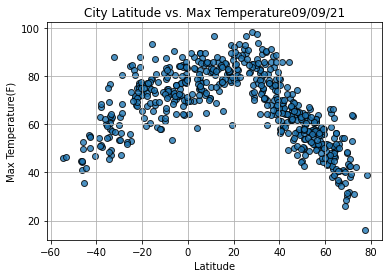

In [95]:
import time
plt.scatter(lats,
           max_temps,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Max Temperature"+time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig1.png")
plt.show()

In [96]:
#Latitude vs Max Temperature plot

In [97]:
######################################################################################################################

In [98]:
#6.3.2

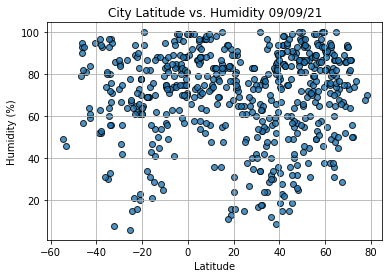

In [99]:
#latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig2.png")
plt.show()

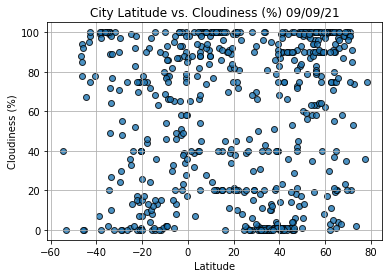

In [100]:
#latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig3.png")
plt.show()

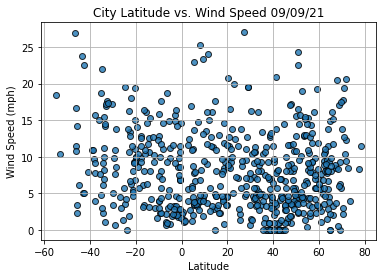

In [101]:
#latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig4.png")
plt.show()

In [102]:
######################################################################################################################

In [103]:
#6.4.1

In [110]:
#y=mx+b
#y: Dependent Variable
#x:Independent Variable
#b:y-intercept

In [ ]:
#6.4.2

In [111]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    #      y       =   m   *    x     +     b
    regress_values = slope * x_values + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
#To get an output from a function, 
#we need to call the function with the correct number of parameters 
#or arguments for the function.

In [117]:
#To lock row 13 from th city_data_df database, let's use the loc method and store data in variable index13
index13=city_data_df.loc[13]

In [124]:
#let's get all the Northern & Southern Hemisphere latitudes
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

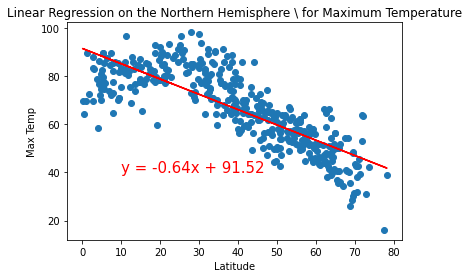

In [125]:
#Perform linear Regression on max temp for northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]

#Let's call the plot_linear_regression function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Northern Hemisphere \ for Maximum Temperature','Max Temp',(10,40))

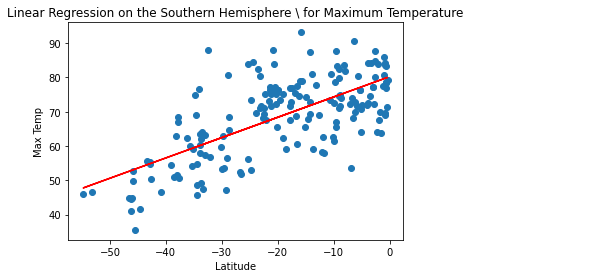

In [139]:
#Perform linear Regression on max temp for southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]

#Let's call the plot_linear_regression function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Southern Hemisphere \ for Maximum Temperature','Max Temp',(10,40))

In [140]:
#The correlation between the latitude and the maximum temperature is strong 
#to very strong because the r-value is less than –0.7 for the Northern Hemisphere 
#and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. 
#This means that as we approach the equator, 0° latitude, the temperatures become warmer. 
#And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

In [ ]:
########################################################################################################################

In [141]:
#6.4.3

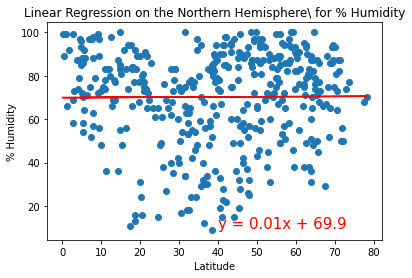

In [144]:
#Perform Linear Regression on the Percent Humidity for the Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Northern Hemisphere\ for % Humidity','% Humidity', (40,10))

In [145]:
#####################################################################################################################

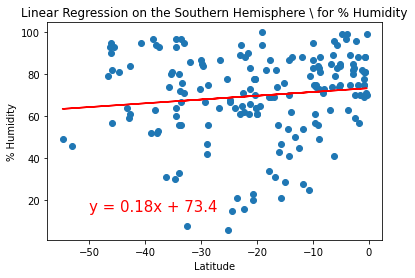

In [150]:
# Linear regression on the Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,15))

In [151]:
#The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 
#for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable 
#due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots.

In [152]:
#####################################################################################################################

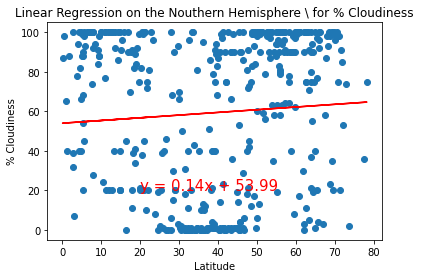

In [156]:
# Linear regression on the Nouthern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Cloudiness', '% Cloudiness',(20,20))

In [155]:
########################################################################################################################

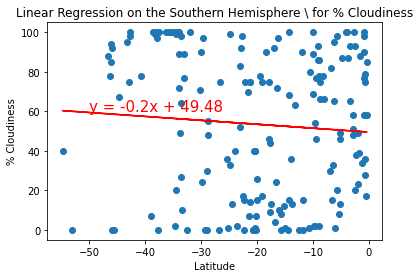

In [158]:
# Linear regression on the Southern Hemisphere for % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness',(-50,60))

In [160]:
#The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 
#for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. 
#This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease 
#percent cloudiness. Check the r-values for your plots. 

In [161]:
########################################################################################################################

In [162]:
#6.4.5

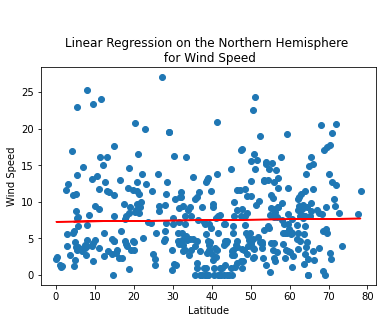

In [165]:
#Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

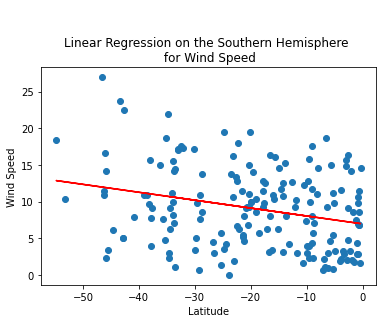

In [167]:
#Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [168]:
#The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 
#for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. 
#This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed.
#Check the r-values for your plots. 